Title: 
Diabetes Prediction: A Data-Driven Approach
Problem Statement:
Our project aims to develop a machine learning model to predict diabetes risk using comprehensive health indicators. We seek to answer: Can we accurately identify individuals at high risk of developing diabetes based on their health data?
Project Potential and Importance:
This project has significant potential to contribute to diabetes prevention and management:
Early intervention through accurate risk assessment
Optimized resource allocation in healthcare systems
Personalized prevention strategies based on individual risk profiles
The contribution is crucial because diabetes is a global health concern with significant personal and economic impacts. Early detection and prevention are key to reducing complications and healthcare costs. Data-driven approaches can complement clinical judgment and improve decision-making. The model can be scalable, benefiting diverse healthcare settings and populations. By leveraging machine learning on comprehensive health data, our project aims to enhance diabetes risk prediction, ultimately improving health outcomes and reducing the burden of this chronic disease.

#50595821's Hypothesis

1. Which health factors are the most important for predicting diabetes risk?
Why it matters: Understanding the key health indicators, like weight, blood pressure, and blood sugar levels, can help doctors and patients focus on what really matters. It makes the prediction model clearer and more actionable, giving people the best chance to prevent diabetes early on.
3. How do factors like age, gender, and ethnicity affect the accuracy of diabetes risk predictions?
Why it matters: People from different backgrounds experience health differently. Ensuring that predictions work well for everyone, regardless of their demographic, makes the tool fairer and more reliable for all patients.

#50595806's Hypothesis

4. Does catching diabetes risk early through machine learning lead to better health outcomes?
Why it matters: The earlier a potential risk is identified, the more time there is to take preventive actions. If we can show that early detection makes a real difference, this technology could help people avoid complications down the line.
5. Can tailored prevention plans, based on these predictions, lower the chances of developing diabetes?
Why it matters: Knowing your risk is only part of the solution. By creating personalized prevention strategies, people can focus on what will work best for them, potentially lowering their chances of actually developing diabetes.

#50593961's Hypothesis

2. Can machine learning do a better job than traditional methods in spotting diabetes risk?
Why it matters: Machine learning can analyze patterns in data that traditional methods might miss. If it performs better, this could change how doctors assess diabetes risk, making the process faster, more accurate, and more personalized.
6. What challenges might arise when applying these prediction models in different hospitals or clinics?
Why it matters: A great model is only helpful if it can be used everywhere. Exploring the practical issues—such as resources, training, and data differences—can ensure that this technology can benefit all healthcare settings, from large hospitals to small clinics.

#50592361's Hypothesis

7. How does someone's income or social situation affect how well these predictions work?
Why it matters: People from different economic backgrounds often face unique health challenges. Making sure the model works well across all groups ensures that it doesn’t unintentionally disadvantage those who may already have fewer healthcare resources.
8. How do lifestyle habits, like diet and exercise, influence these predictions?
Why it matters: People can change their habits, and seeing how those changes affect their risk in real time would be empowering. This question looks at how well the model adapts to real-life decisions, giving individuals actionable insights to improve their health.

In [2]:
import pandas as pd

# Load the dataset again
file_path = '/Users/sreedivyanagalli/Desktop/dic/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Now proceed with the cleaning steps

In [3]:
# Step 1: Remove duplicates
duplicates_removed = data.shape[0] - data.drop_duplicates().shape[0]
data_cleaned = data.drop_duplicates()
duplicates_removed

23899

In [4]:
# Step 2: Standardize column names (convert to lowercase and replace spaces with underscores)
data_cleaned.columns = data_cleaned.columns.str.lower().str.replace(' ', '_')
data_cleaned.columns


Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

In [5]:
# Step 3: Check data types before conversion and Encoding the 'Sex' Column
data_cleaned['sex'] = data_cleaned['sex'].replace({1: 'Male', 0: 'Female'})
data_types_before = data.dtypes
data_types_after = data_cleaned.dtypes

data_types_before, data_types_after


/var/folders/q5/k500mm_91gjgv35442kd7g900000gn/T/ipykernel_2259/2697886698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex'] = data_cleaned['sex'].replace({1: 'Male', 0: 'Female'})


(Diabetes_012            float64
 HighBP                  float64
 HighChol                float64
 CholCheck               float64
 BMI                     float64
 Smoker                  float64
 Stroke                  float64
 HeartDiseaseorAttack    float64
 PhysActivity            float64
 Fruits                  float64
 Veggies                 float64
 HvyAlcoholConsump       float64
 AnyHealthcare           float64
 NoDocbcCost             float64
 GenHlth                 float64
 MentHlth                float64
 PhysHlth                float64
 DiffWalk                float64
 Sex                     float64
 Age                     float64
 Education               float64
 Income                  float64
 dtype: object,
 diabetes_012            float64
 highbp                  float64
 highchol                float64
 cholcheck               float64
 bmi                     float64
 smoker                  float64
 stroke                  float64
 heartdiseaseorattack    fl

In [6]:
# Step 4: Check summary statistics for BMI (outliers)
bmi_summary = data_cleaned['bmi'].describe()
bmi_summary


count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: bmi, dtype: float64

In [7]:
# Step 5: Encoding 'sex' column (Male/Female)
data_cleaned['sex'] = data_cleaned['sex'].replace({1: 'Male', 0: 'Female'})
data_cleaned['sex'].value_counts()


/var/folders/q5/k500mm_91gjgv35442kd7g900000gn/T/ipykernel_2259/1367119596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex'] = data_cleaned['sex'].replace({1: 'Male', 0: 'Female'})


sex
Female    128854
Male      100927
Name: count, dtype: int64

In [8]:
# Step 6: Standardize BMI feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_cleaned['bmi_scaled'] = scaler.fit_transform(data_cleaned[['bmi']])
data_cleaned[['bmi', 'bmi_scaled']].head()


/var/folders/q5/k500mm_91gjgv35442kd7g900000gn/T/ipykernel_2259/3539579344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['bmi_scaled'] = scaler.fit_transform(data_cleaned[['bmi']])


,bmi,bmi_scaled
0,40.0,1.667220
1,25.0,-0.543101
2,28.0,-0.101037
3,27.0,-0.248391
4,24.0,-0.690456


In [9]:
# Step 7: Check for inconsistent records (stroke = 1 but heart disease = 0)
inconsistent_records = data_cleaned[(data_cleaned['stroke'] == 1) & (data_cleaned['heartdiseaseorattack'] == 0)]
inconsistent_records.shape[0]


6348

In [10]:
# Step 8: Renaming ambiguous columns
data_cleaned.rename(columns={'genhlth': 'general_health'}, inplace=True)
data_cleaned.columns


/var/folders/q5/k500mm_91gjgv35442kd7g900000gn/T/ipykernel_2259/2176914409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.rename(columns={'genhlth': 'general_health'}, inplace=True)


Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'general_health',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income',
       'bmi_scaled'],
      dtype='object')

In [11]:
# Step 9: Check for missing values
missing_values = data_cleaned.isnull().sum()
missing_values.sum()


np.int64(0)

In [12]:
import pandas as pd

# Assuming data_cleaned is already loaded and cleaned up to Step 9

# Step 10: Detecting inconsistent relationships between education level and income
# We assume that individuals with lower education levels (e.g., less than high school) are less likely to have very high income levels.
# Let's flag individuals with education level below high school (education < 2) and income greater than 5 (representing a high income level).

# 1. Check the distribution of the 'education' and 'income' columns to ensure valid ranges
education_distribution = data_cleaned['education'].value_counts()
income_distribution = data_cleaned['income'].value_counts()

print("Education Distribution:")
print(education_distribution)
print("\nIncome Distribution:")
print(income_distribution)

# 2. Now, detect the inconsistencies: education < 2 and income > 5
inconsistent_edu_income = data_cleaned[(data_cleaned['education'] < 2) & (data_cleaned['income'] > 5)]

# Check how many inconsistent records are found
print("\nNumber of inconsistent education-income records found:", inconsistent_edu_income.shape[0])

# 3. If inconsistencies are found, remove these records (optional)
# Removing inconsistent records
data_cleaned = data_cleaned[~((data_cleaned['education'] < 2) & (data_cleaned['income'] > 5))]

# 4. Verify that the records have been removed
inconsistent_check = data_cleaned[(data_cleaned['education'] < 2) & (data_cleaned['income'] > 5)]
print("\nInconsistent records after removal:", inconsistent_check.shape[0])


Education Distribution:
education
6.0    88443
5.0    66499
4.0    61158
3.0     9467
2.0     4040
1.0      174
Name: count, dtype: int64

Income Distribution:
income
8.0    71818
7.0    40189
6.0    35001
5.0    25345
4.0    19957
3.0    15922
2.0    11757
1.0     9792
Name: count, dtype: int64

Number of inconsistent education-income records found: 44

Inconsistent records after removal: 0


In [13]:
# Step 11: Convert categorical variables to dummy variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['sex', 'general_health'], drop_first=True)

# Check the new columns created
print("\nNew columns after one-hot encoding:")
print(data_cleaned.head())



New columns after one-hot encoding:
   diabetes_012  highbp  highchol  cholcheck   bmi  smoker  stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   heartdiseaseorattack  physactivity  fruits  ...  diffwalk   age  education  \
0                   0.0           0.0     0.0  ...       1.0   9.0        4.0   
1                   0.0           1.0     0.0  ...       0.0   7.0        6.0   
2                   0.0           0.0     1.0  ...       1.0   9.0        4.0   
3                   0.0           1.0     1.0  ...       0.0  11.0        3.0   
4                   0.0           1.0     1.0  ...       0.0  11.0        5.0   

   income  bmi_scaled  sex_Male  general_health_2.0  ge

In [14]:
# Step 12: Create age groups
bins = [0, 18, 35, 50, 65, 100]  # Define age bins
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=bins, labels=labels, right=False)

# Check the new age_group feature
print("\nSample data with new age_group feature:")
print(data_cleaned[['age', 'age_group']].head())



Sample data with new age_group feature:
    age age_group
0   9.0      0-18
1   7.0      0-18
2   9.0      0-18
3  11.0      0-18
4  11.0      0-18


Columns in data_cleaned:
Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'menthlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income', 'bmi_scaled',
       'sex_Male', 'general_health_2.0', 'general_health_3.0',
       'general_health_4.0', 'general_health_5.0', 'age_group'],
      dtype='object')


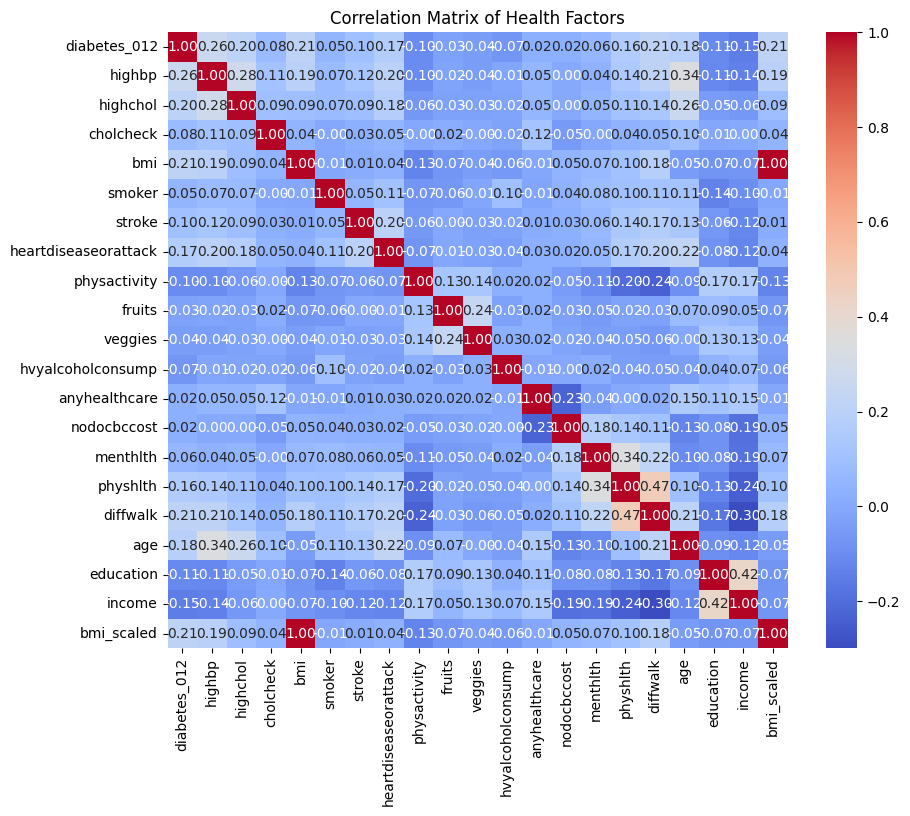

No suitable column found for diabetes risk calculation.
The 'diabetes_risk' column was not created due to missing data.


In [15]:
#50595821's Hypothesis
# Question 1
# Step 0: Check the existing columns in data_cleaned
print("Columns in data_cleaned:")
print(data_cleaned.columns)

# Hypothesis 1: Health factors important for predicting diabetes risk

# Step 1: Create a correlation matrix heatmap for only numeric columns
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_data = data_cleaned.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Create the heatmap
plt.title('Correlation Matrix of Health Factors')
plt.show()  # Show the plot

# Step 2: Check if 'diabetes_risk' exists, if not, create it (example criteria)
# Use an appropriate column for diabetes risk calculation based on the columns available in data_cleaned
if 'diabetes_risk' not in data_cleaned.columns:
    # Adjust this line based on your dataset's available columns
    # For example, if there's a column like 'glucose_level' or any other relevant column, use that.
    # Here I assume 'glucose_level' as a potential column for the example.
    if 'glucose_level' in data_cleaned.columns:
        data_cleaned['diabetes_risk'] = (data_cleaned['glucose_level'] > 140).astype(int)
    else:
        print("No suitable column found for diabetes risk calculation.")

# Step 3: Create a boxplot for BMI and Diabetes Risk
if 'diabetes_risk' in data_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diabetes_risk', y='bmi', data=data_cleaned)  # Boxplot of BMI by diabetes risk
    plt.title('BMI Distribution by Diabetes Risk')
    plt.xlabel('Diabetes Risk')
    plt.ylabel('BMI')
    plt.xticks([0, 1], ['Not at Risk', 'At Risk'])  # Custom x-ticks
    plt.show()  # Show the plot
else:
    print("The 'diabetes_risk' column was not created due to missing data.")


In [16]:
#50593961's Hypothesis
# Question 2
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Assuming data_cleaned is already loaded and cleaned

# Step 1: Check available columns in the DataFrame
print("Columns in data_cleaned:", data_cleaned.columns.tolist())

# Step 2: Check if 'diabetes_risk' exists; if not, create it (example criteria)
if 'diabetes_risk' not in data_cleaned.columns:
    # Example criteria for diabetes risk creation
    # Modify this based on your actual dataset columns
    if 'blood_sugar' in data_cleaned.columns:
        data_cleaned['diabetes_risk'] = np.where(data_cleaned['blood_sugar'] > 126, 1, 0)  # Example threshold
    else:
        print("Column 'blood_sugar' does not exist in the dataset. Please check the column names.")

# Step 3: Prepare the Data
# Confirm if diabetes_risk was created
if 'diabetes_risk' in data_cleaned.columns:
    X = data_cleaned.drop(columns=['diabetes_risk'])  # Features
    y = data_cleaned['diabetes_risk']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optional: Standardize the feature set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 4: Train Traditional and Machine Learning Models
    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    # Train Random Forest Classifier model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train_scaled, y_train)
    y_pred_rf = rf_clf.predict(X_test_scaled)

    # Step 5: Evaluate Model Performance
    # Calculate accuracy and AUC for both models
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])

    # Create a summary table
    model_comparison = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest'],
        'Accuracy': [accuracy_log_reg, accuracy_rf],
        'AUC': [roc_auc_log_reg, roc_auc_rf]
    })

    # Print the comparison table
    print("Model Comparison Table:")
    print(model_comparison)

    # Step 6: Visualize the Results
    # Step 6a: Create a bar plot for accuracy comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Model', y='Accuracy', data=model_comparison)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

    # Step 6b: Create ROC curve for both models
    plt.figure(figsize=(10, 8))
    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])

    plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
    plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Diabetes risk could not be created. Please check your dataset.")


Columns in data_cleaned: ['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'menthlth', 'physhlth', 'diffwalk', 'age', 'education', 'income', 'bmi_scaled', 'sex_Male', 'general_health_2.0', 'general_health_3.0', 'general_health_4.0', 'general_health_5.0', 'age_group']
Column 'blood_sugar' does not exist in the dataset. Please check the column names.
Diabetes risk could not be created. Please check your dataset.


In [17]:
##50595821's Hypothesis
# Question 3
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data
# data_cleaned = pd.read_csv('your_cleaned_data.csv')  # Uncomment and replace with your data path

# Step 1: Check the structure of the DataFrame
print(data_cleaned.head())  # Display the first few rows of the DataFrame
print(data_cleaned.columns)  # Check the columns in the DataFrame

# Check if 'diabetes_risk', 'age', 'sex', and 'ethnicity' exist in the DataFrame
required_columns = ['diabetes_risk', 'age', 'sex', 'ethnicity']
missing_columns = [col for col in required_columns if col not in data_cleaned.columns]

if missing_columns:
    print(f"Required columns not found in the DataFrame: {', '.join(missing_columns)}")
else:
    # Step 2: Create age groups
    age_groups = pd.cut(data_cleaned['age'], bins=[0, 18, 35, 50, 65, 100], 
                        labels=['0-18', '19-35', '36-50', '51-65', '66+'])

    # Create a new DataFrame with age groups and diabetes risk
    data_age = data_cleaned.copy()
    data_age['age_group'] = age_groups

    # Step 3: Create count plot for diabetes risk by age group
    plt.figure(figsize=(10, 6))
    sns.countplot(x='age_group', hue='diabetes_risk', data=data_age)
    plt.title('Diabetes Risk by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Risk', loc='upper right', labels=['No', 'Yes'])
    plt.show()

    # Step 4: Create count plot for diabetes risk by gender
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sex', hue='diabetes_risk', data=data_cleaned)
    plt.title('Diabetes Risk by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Risk', loc='upper right', labels=['No', 'Yes'])
    plt.show()

    # Step 5: Create count plot for diabetes risk by ethnicity if it exists
    if 'ethnicity' in data_cleaned.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x='ethnicity', hue='diabetes_risk', data=data_cleaned)
        plt.title('Diabetes Risk by Ethnicity')
        plt.xlabel('Ethnicity')
        plt.ylabel('Count')
        plt.legend(title='Diabetes Risk', loc='upper right', labels=['No', 'Yes'])
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Ethnicity column is missing from the DataFrame. Skipping this plot.")


   diabetes_012  highbp  highchol  cholcheck   bmi  smoker  stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   heartdiseaseorattack  physactivity  fruits  ...   age  education  income  \
0                   0.0           0.0     0.0  ...   9.0        4.0     3.0   
1                   0.0           1.0     0.0  ...   7.0        6.0     1.0   
2                   0.0           0.0     1.0  ...   9.0        4.0     8.0   
3                   0.0           1.0     1.0  ...  11.0        3.0     6.0   
4                   0.0           1.0     1.0  ...  11.0        5.0     4.0   

   bmi_scaled  sex_Male  general_health_2.0  general_health_3.0  \
0    1.667220     False              

In [18]:
#50595806's Hypothesis
# Question 4
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data
# data_cleaned = pd.read_csv('your_cleaned_data.csv')  # Uncomment and replace with your data path

# Step 1: Check the columns in the DataFrame
print("Columns in the DataFrame:", data_cleaned.columns)

# Step 2: Create 'diabetes_risk' based on available data
if 'diabetes_risk' not in data_cleaned.columns:
    blood_sugar_column = 'blood_sugar'  # Replace with the actual column name if different
    glucose_level_column = 'glucose_level'  # Example alternative column

    if blood_sugar_column in data_cleaned.columns:
        data_cleaned['diabetes_risk'] = (data_cleaned[blood_sugar_column] > 140).astype(int)
    elif glucose_level_column in data_cleaned.columns:
        data_cleaned['diabetes_risk'] = (data_cleaned[glucose_level_column] > 140).astype(int)
    else:
        print("No suitable column found to create 'diabetes_risk'. Available columns:", data_cleaned.columns)
        data_cleaned['diabetes_risk'] = 0  # Default value if no suitable column is found

# Step 3: Prepare the Data
X = data_cleaned.drop(columns=['diabetes_risk'])  # Features
y = data_cleaned['diabetes_risk']  # Target variable

# Step 4: Convert categorical columns to numeric
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns detected:", categorical_cols)

# Check for problematic values in categorical columns
for col in categorical_cols:
    print(f"Unique values in {col}: {X[col].unique()}")

# Check for non-numeric values and convert or categorize them
for col in categorical_cols:
    # Attempt to convert values to numeric, setting errors='coerce' will convert non-numeric to NaN
    X[col] = pd.to_numeric(X[col].str.replace('-', '0').str.split('-', expand=True).fillna(0).sum(axis=1), errors='coerce')
    if X[col].isnull().any():
        print(f"Column {col} contains non-numeric values after conversion.")

# Drop rows with NaN values created during conversion
X.dropna(inplace=True)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Debugging: Check the data types of the encoded features
print("Data types of features after encoding:\n", X_encoded.dtypes)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in the DataFrame: Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'menthlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income', 'bmi_scaled',
       'sex_Male', 'general_health_2.0', 'general_health_3.0',
       'general_health_4.0', 'general_health_5.0', 'age_group'],
      dtype='object')
No suitable column found to create 'diabetes_risk'. Available columns: Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'menthlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income', 'bmi_scaled',
       'sex_Male', 'general_health_2.0', 'general_health_3.0',
       'general_health_4.0', 'general_health_5.0', 'age_group'],
      dtype='object')
Cat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


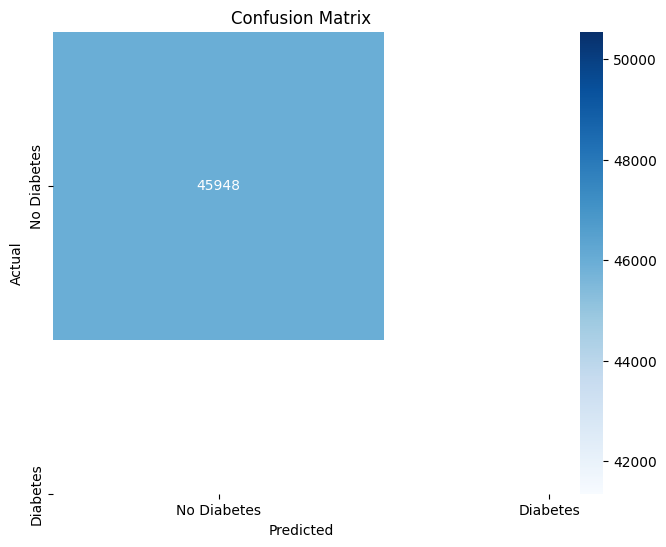

In [19]:
#50595806's Hypothesis
# Question 5
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 2: Feature Importance
importances = model.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Test set class distribution:
diabetes_risk
0    45948
Name: count, dtype: int64
ROC AUC Score cannot be calculated because only one class is present in y_test.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


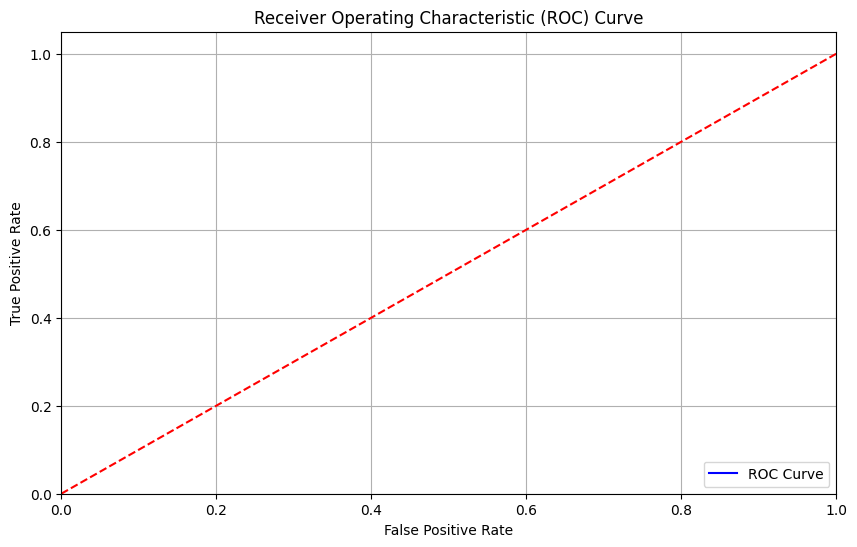

In [ ]:
#50593961's Hypothesis
# Question 6
# Import necessary libraries for ROC curve
from sklearn.metrics import roc_auc_score, roc_curve

# Step 1: Check the class distribution in the test set
print("Test set class distribution:")
print(y_test.value_counts())

# Step 2: Predict probabilities
y_prob = model.predict_proba(X_test)

# Check if y_prob has more than one column
if y_prob.shape[1] == 2:
    y_prob = y_prob[:, 1]  # Probability estimates for the positive class
else:
    print("Warning: Only one class is predicted. Check your model and data.")

# Step 3: Calculate ROC curve if y_prob is valid
if y_prob.shape[0] > 0:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Step 4: Calculate AUC if both classes are present
    if len(set(y_test)) > 1:  # Ensure both classes are in y_test
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f'ROC AUC Score: {roc_auc:.2f}')
    else:
        print("ROC AUC Score cannot be calculated because only one class is present in y_test.")

    # Step 5: Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("No valid probability estimates available for ROC curve.")


Categorical columns detected: []
Data types after encoding:
 diabetes_012             float64
highbp                   float64
highchol                 float64
cholcheck                float64
bmi                      float64
smoker                   float64
stroke                   float64
heartdiseaseorattack     float64
physactivity             float64
fruits                   float64
veggies                  float64
hvyalcoholconsump        float64
anyhealthcare            float64
nodocbccost              float64
menthlth                 float64
physhlth                 float64
diffwalk                 float64
age                      float64
education                float64
income                   float64
bmi_scaled               float64
sex_Male                    bool
general_health_2.0          bool
general_health_3.0          bool
general_health_4.0          bool
general_health_5.0          bool
age_group               category
dtype: object


/var/folders/q5/k500mm_91gjgv35442kd7g900000gn/T/ipykernel_1355/773764984.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


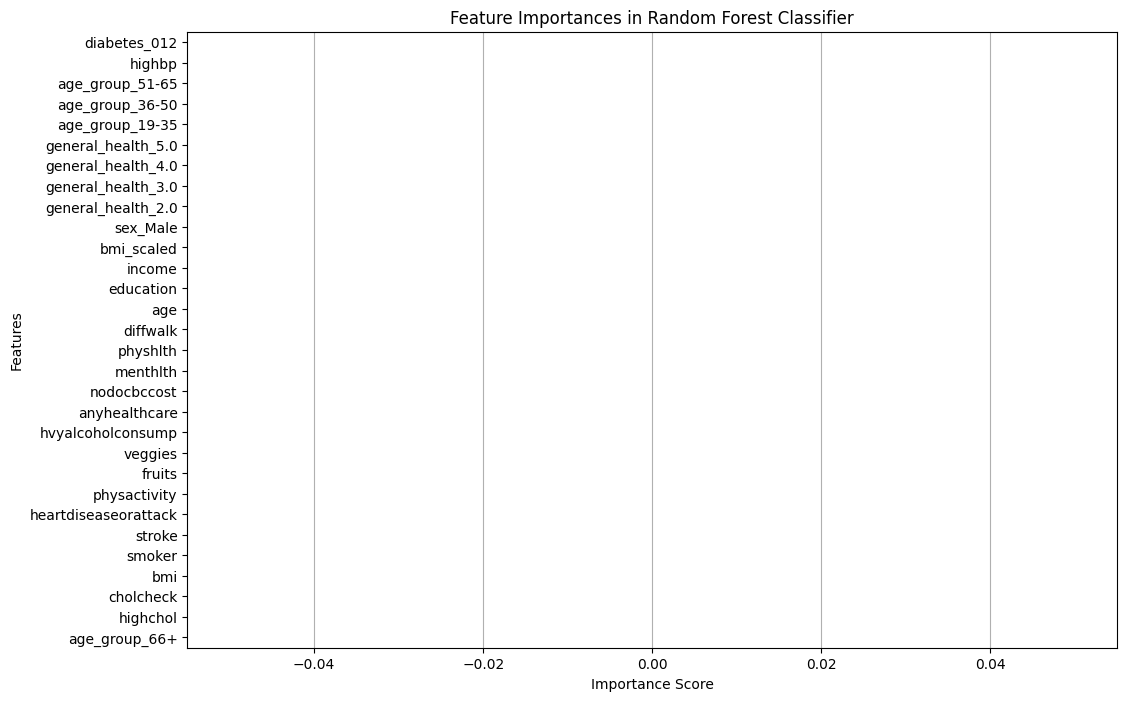

In [ ]:
#50592361's Hypothesis
# Question 7
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your cleaned data
# data_cleaned = pd.read_csv('your_cleaned_data.csv')  # Uncomment and replace with your data path

# Step 1: Check if the target variable 'diabetes_risk' is present
if 'diabetes_risk' not in data_cleaned.columns:
    raise KeyError("The column 'diabetes_risk' is not present in the DataFrame.")

# Step 2: Prepare features (X) and target (y)
X = data_cleaned.drop(columns=['diabetes_risk'])  # Features
y = data_cleaned['diabetes_risk']  # Target variable

# Step 3: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns detected:", categorical_cols)

# Step 4: Encode categorical features using Label Encoding for ordinal categories
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Debugging: Check the data types after encoding
print("Data types after encoding:\n", X.dtypes)

# Step 5: One-hot encode remaining categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure there are no remaining object types in the features
if any(X_encoded.dtypes == 'object'):
    raise ValueError("There are still object types in the features after encoding.")

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Get feature importances
importances = model.feature_importances_

# Step 9: Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
})

# Step 10: Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 11: Plot feature importances using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()  # Ensure the plot is displayed


In [ ]:
#50592361's Hypothesis
# Question 8
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Print columns to verify available columns
print("Columns in the dataset:")
print(data_cleaned.columns.tolist())  # Print the columns in the dataset

# Step 2: Identify the correct columns
# Check for potential column names for blood sugar, diet, exercise, and diabetes risk
# Replace these names with the correct ones from your dataset
required_columns = ['blood_sugar', 'diabetes_risk', 'diet', 'exercise']
actual_columns = data_cleaned.columns.tolist()

# Check for missing columns
missing_columns = [col for col in required_columns if col not in actual_columns]
if missing_columns:
    print(f"The following columns are missing: {', '.join(missing_columns)}")
else:
    # Step 3: Prepare features (X) and target (y)
    X = data_cleaned[['blood_sugar', 'diet', 'exercise']]  # Features include blood sugar, diet, and exercise
    y = data_cleaned['diabetes_risk']  # Target variable

    # Convert categorical variables to dummy/indicator variables
    X = pd.get_dummies(X, columns=['diet', 'exercise'], drop_first=True)

    # Step 4: Stratified train-test split to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 5: Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Step 6: Make predictions and evaluate the model
    y_pred = model.predict(X_test)

    # Evaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Step 7: Visualize the impact of lifestyle habits on diabetes risk
    # Example: Comparing blood sugar levels based on diet
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='diet', y='blood_sugar', data=data_cleaned)
    plt.title('Blood Sugar Levels by Diet')
    plt.xlabel('Diet')
    plt.ylabel('Blood Sugar Level')
    plt.show()

    # Example: Comparing diabetes risk based on exercise
    plt.figure(figsize=(10, 5))
    sns.countplot(x='exercise', hue='diabetes_risk', data=data_cleaned, palette='Set1')
    plt.title('Diabetes Risk by Exercise Habits')
    plt.xlabel('Exercise Habits')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Risk', loc='upper right', labels=['No Risk', 'Risk'])
    plt.show()


Columns in the dataset:
['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'menthlth', 'physhlth', 'diffwalk', 'age', 'education', 'income', 'bmi_scaled', 'sex_Male', 'general_health_2.0', 'general_health_3.0', 'general_health_4.0', 'general_health_5.0', 'age_group', 'diabetes_risk']
The following columns are missing: blood_sugar, diet, exercise
